# Introduction

Anda akan belajar bagaimana memanfaatkan plotting tools dasar dengan Python, dan bagaimana membuat anotasi dan mempersonalisasi plot time series Anda. Pada akhir bab ini, Anda akan dapat mengambil dataset statis apa pun dan menghasilkan plot data yang menarik.

### Time series in the field of Data Science

* Time series adalah cara mendasar untuk menyimpan dan menganalisis berbagai jenis data
* Data keuangan, cuaca, dan perangkat semuanya dapat ditangani dengan baik sebagai time series

### Working with dates

Untuk bekerja dengan data time series dalam pandas, kolom tanggal Anda harus menggunakan tipe `datetime64`.

In [1]:
# Import pandas
import pandas as pd

In [ ]:
pd.to_datetime(['2020/03/25', 'test']) # ValueError: Unknown string format

In [3]:
pd.to_datetime(['2020/03/25', 'test'], errors='coerce')

DatetimeIndex(['2020-03-25', 'NaT'], dtype='datetime64[ns]', freq=None)

### Load your time series data

In [4]:
url_discoveries = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch1_discoveries.csv'

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(url_discoveries)

# Display the first five lines of the DataFrame
discoveries.head()

,date,Y
0,01-01-1860,5
1,01-01-1861,3
2,01-01-1862,0
3,01-01-1863,2
4,01-01-1864,0


### Test whether your data is of the correct type

Ketika bekerja dengan data time series dalam pandas, informasi tanggal apa pun harus diformat sebagai tipe `datetime64`. Oleh karena itu, penting untuk memeriksa bahwa kolom yang berisi informasi tanggal adalah jenis yang benar. Anda dapat memeriksa jenis setiap kolom dalam DataFrame dengan menggunakan atribut `.dtypes`.

In [5]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

date    object
Y        int64
dtype: object


In [6]:
# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

In [7]:
# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    datetime64[ns]
Y                int64
dtype: object


## Plot your first time series

### The Matplotlib library

* Dalam Python, matplotlib adalah paket luas yang digunakan untuk memplot data
* Submodule `pyplot` dari matplotlib secara tradisional diimpor menggunakan alias `plt`

In [8]:
import matplotlib.pyplot as plt

### Your first plot!

Anda akan menetapkan dasar dengan membuat plot time series dari data Anda dan memberi label sumbu plot Anda, karena ini membuat plot lebih mudah dibaca dan diinterpretasikan untuk audiens yang dituju.

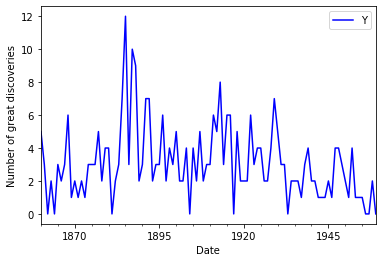

In [13]:
# Load data
discoveries = pd.read_csv('datasets/ch1_discoveries.csv')

# Convert to datetime
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

**Catatan** : Sepertinya jumlah penemuan hebat terbesar terjadi pada tahun 1885.

### Specify plot styles

Library matplotlib juga dilengkapi dengan sejumlah stylesheet bawaan yang memungkinkan Anda untuk menyesuaikan tampilan plot Anda. Untuk menggunakan style sheet tertentu untuk plot Anda, Anda dapat menggunakan perintah `plt.style.use(your_stylesheet)` di mana `your_stylesheet` adalah nama dari style sheet.

Untuk melihat daftar style sheet yang tersedia yang dapat digunakan, Anda dapat menggunakan perintah `print(plt.style.available)`.

In [14]:
print(plt.style.available)

['seaborn-white', 'fivethirtyeight', 'seaborn-darkgrid', 'classic', 'tableau-colorblind10', 'seaborn-dark', 'fast', 'seaborn-paper', 'seaborn-dark-palette', 'bmh', 'seaborn-poster', '_classic_test', 'ggplot', 'seaborn-talk', 'seaborn-muted', 'Solarize_Light2', 'seaborn-whitegrid', 'seaborn-notebook', 'seaborn-bright', 'grayscale', 'dark_background', 'seaborn-pastel', 'seaborn-deep', 'seaborn', 'seaborn-ticks', 'seaborn-colorblind']


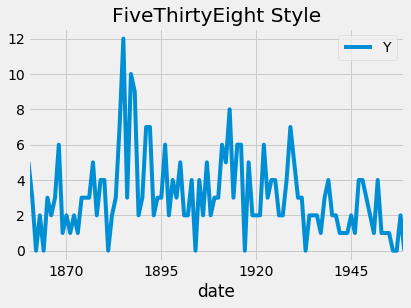

In [15]:
# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

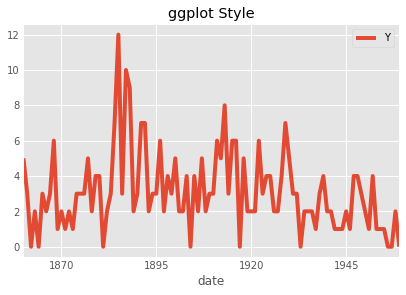

In [16]:
# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

### Display and label plots

Seperti yang Anda lihat sebelumnya, jika indeks pandas DataFrame terdiri dari tanggal, maka pandas akan secara otomatis memformat sumbu x dengan cara yang dapat dibaca manusia. Selain itu, metode `.plot()` memungkinkan Anda menentukan berbagai parameter lain untuk menyesuaikan plot time series Anda (warna garis, lebar garis, dan ukuran gambar).

Anda mungkin telah memperhatikan penggunaan notasi `ax = df.plot(...)` dan bertanya-tanya tentang tujuan objek `ax`. Ini karena fungsi plot mengembalikan objek matplotlib `AxesSubplot`, dan merupakan praktik umum untuk menetapkan objek yang dikembalikan ini ke variabel yang disebut `ax`. Melakukan hal itu juga memungkinkan Anda untuk memasukkan notasi dan spesifikasi tambahan ke plot Anda seperti label sumbu.

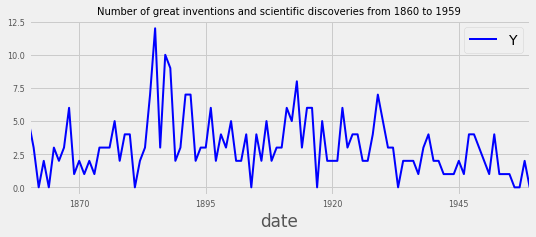

In [43]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=8)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=10)

# Show plot
plt.show()

## Customize your time series plot

### Slicing time series data

In [22]:
discoveries['1940':'1945']

,Y
date,
1940-01-01,2
1941-01-01,2
1942-01-01,1
1943-01-01,1
1944-01-01,1
1945-01-01,2


In [23]:
discoveries['1950-01':'1950-12']

,Y
date,
1950-01-01,2


In [24]:
discoveries['1940-01-01':'1940-01-15']

,Y
date,
1940-01-01,2


### Subset time series data

Saat memplotting data time series, kadang-kadang Anda mungkin ingin memvisualisasikan hanya sebagian dari data tersebut. Library pandas menyediakan metode pengindeksan dan subset yang powerful yang memungkinkan Anda untuk mengekstrak bagian tertentu dari DataFrame. Misalnya, Anda bisa mengelompokkan semua data antara tahun 1950 dan 1960 di dalam DataFrame `discoveries` dengan menentukan rentang tanggal berikut:

`subset_data = discoveries['1950-01-01':'1960-01-01']`

**Catatan** : Subsetting data dengan cara ini hanya mungkin jika indeks DataFrame berisi tanggal dari tipe `datetime`. Jika gagal, pandas library akan mengembalikan pesan kesalahan.

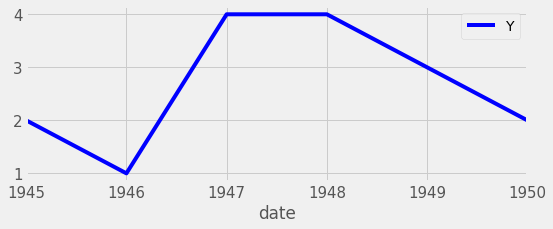

In [40]:
# Choose theme
plt.style.use('fivethirtyeight')

# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15, figsize=(8, 3))

# Show plot
plt.show()

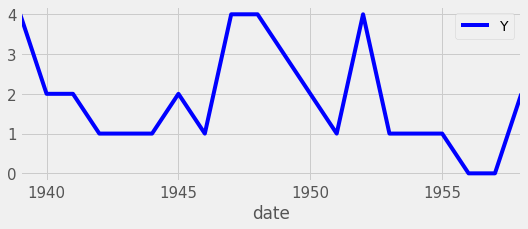

In [39]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-1':'1958-1']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15, figsize=(8, 3))

# Show plot
plt.show()

### Add vertical and horizontal markers

Anotasi tambahan dapat membantu lebih menekankan pengamatan atau peristiwa tertentu. Di sini, Anda akan belajar cara menyorot peristiwa penting dengan menambahkan **markers** pada timestamps tertentu dari plot time series Anda. Library matplotlib memungkinkan untuk menggambar garis vertikal dan horizontal untuk mengidentifikasi tanggal tertentu.

Ingat bahwa indeks dari DataFrame `discoveries` adalah tipe `datetime`, sehingga nilai sumbu x dari plot juga akan berisi tanggal, dan dimungkinkan untuk secara langsung memasukkan tanggal ketika menganotasi plot Anda dengan garis vertikal. Misalnya, garis vertikal pada 1 Januari 1945 dapat ditambahkan ke plot Anda dengan menggunakan perintah:

`ax.axvline('1945-01-01', linestyle='--')`

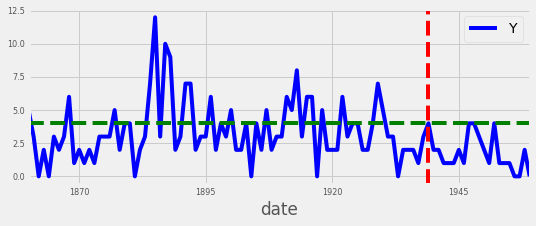

In [38]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=8, figsize=(8, 3))

# Add a red vertical line
ax.axvline(x='1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(y=4, color='green', linestyle='--')

plt.show()

### Add shaded regions to your plot

Saat memplot data time series dalam Python, Anda juga dapat menyorot seluruh wilayah plot time series Anda. Untuk menambahkan wilayah yang diarsir antara 1 Januari 1936 dan 1 Januari 1950, Anda dapat menggunakan perintah:

`ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)`

Di sini, kita menentukan transparansi keseluruhan wilayah dengan menggunakan argumen `alpha` (di mana `0` benar-benar transparan dan `1` berwarna penuh).

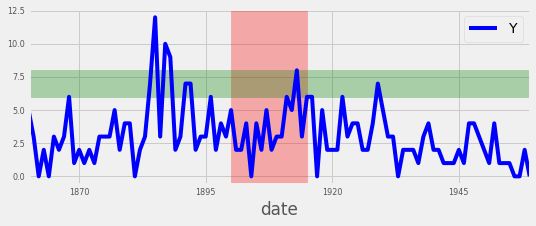

In [37]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=8, figsize=(8, 3))

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()